In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sqlite3
import os
import sys

In [4]:
# This is the directory where you cloned the repo
path_to_repo = '/Users/ljob/Desktop/'

# Path to download data to
dir = path_to_repo + 'cnbs-predictor/data/'

# Path to input CFS forecast database
cnbs_forecast = dir + 'forecast/cnbs_forecast.db'

In [13]:
# Create a connection to the SQLite database
conn = sqlite3.connect(cnbs_forecast)

# Define the query to get all the data
query = '''
SELECT * FROM cnbs_forecast
'''

# Execute the query and fetch the data into a DataFrame
data = pd.read_sql(query, conn)

# Close the connection once done
conn.close()

#data.set_index(['cfs_run', 'month', 'year'], drop=True, inplace=True)

In [14]:
print(data)

           cfs_run  month  year model            lake           cnbs  \
0       2024062600      4  2025    GP            erie    evaporation   
1       2024062600      4  2025    GP            erie  precipitation   
2       2024062600      4  2025    GP            erie         runoff   
3       2024062600      4  2025    GP            erie           cnbs   
4       2024062600      4  2025    GP  michigan-huron    evaporation   
...            ...    ...   ...   ...             ...            ...   
335099  2025032018     12  2025    NN         ontario           cnbs   
335100  2025032018     12  2025    NN        superior    evaporation   
335101  2025032018     12  2025    NN        superior  precipitation   
335102  2025032018     12  2025    NN        superior         runoff   
335103  2025032018     12  2025    NN        superior           cnbs   

             value  
0        68.237204  
1        91.151886  
2       135.192704  
3       158.107385  
4        49.498507  
...      

In [17]:
filtered_data = data[(data['month'] == 4) & (data['year'] == 2025) & (data['lake'] == 'erie')]

In [18]:
print(filtered_data)

           cfs_run  month  year model  lake           cnbs       value
0       2024062600      4  2025    GP  erie    evaporation   68.237204
1       2024062600      4  2025    GP  erie  precipitation   91.151886
2       2024062600      4  2025    GP  erie         runoff  135.192704
3       2024062600      4  2025    GP  erie           cnbs  158.107385
16      2024062606      4  2025    GP  erie    evaporation   60.624126
...            ...    ...   ...   ...   ...            ...         ...
334819  2025032012      4  2025    NN  erie           cnbs  165.452789
334960  2025032018      4  2025    NN  erie    evaporation   95.178551
334961  2025032018      4  2025    NN  erie  precipitation   68.927513
334962  2025032018      4  2025    NN  erie         runoff   67.236526
334963  2025032018      4  2025    NN  erie           cnbs   40.985481

[17152 rows x 7 columns]


       index     cfs_run  month  year model  lake  cnbs       value
0     167555  2024062600      4  2025    LR  erie  cnbs   99.909650
1     167571  2024062606      4  2025    LR  erie  cnbs  106.656860
2     167587  2024062612      4  2025    LR  erie  cnbs  178.944090
3     167603  2024062618      4  2025    LR  erie  cnbs  138.154858
4     167619  2024062700      4  2025    LR  erie  cnbs  141.442973
...      ...         ...    ...   ...   ...   ...   ...         ...
1067  250611  2025031918      4  2025    LR  erie  cnbs    5.790843
1068  250755  2025032000      4  2025    LR  erie  cnbs  178.156833
1069  250899  2025032006      4  2025    LR  erie  cnbs  102.265984
1070  251043  2025032012      4  2025    LR  erie  cnbs  146.117643
1071  251187  2025032018      4  2025    LR  erie  cnbs   39.135152

[1072 rows x 8 columns]


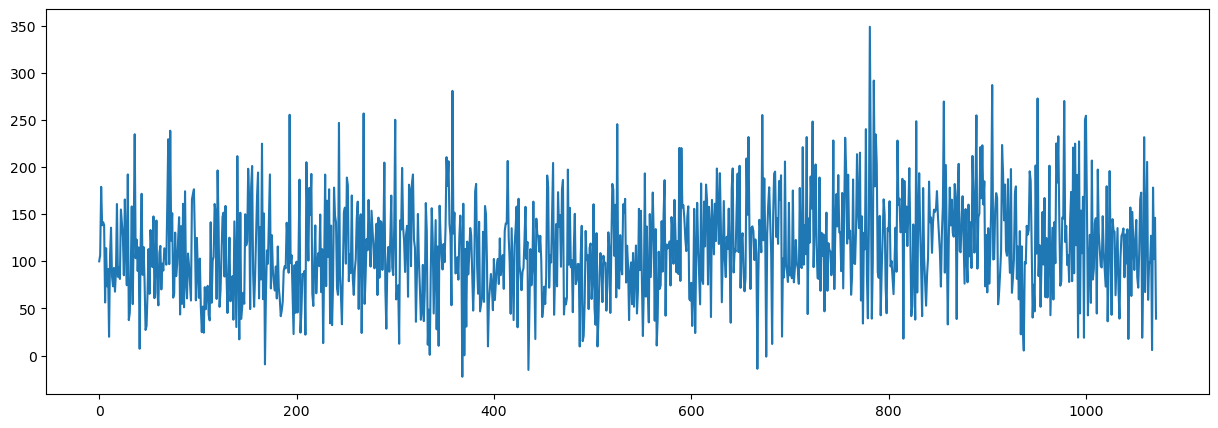

In [29]:
filtered_data = data[(data['month'] == 4) & (data['year'] == 2025) & (data['lake'] == 'erie') & (data['cnbs'] == 'cnbs') & (data['model'] == 'LR')].reset_index()
print(filtered_data)
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.plot(filtered_data.index, filtered_data['value'])

ValueError: ('Lengths must match to compare', (17152,), (4,))

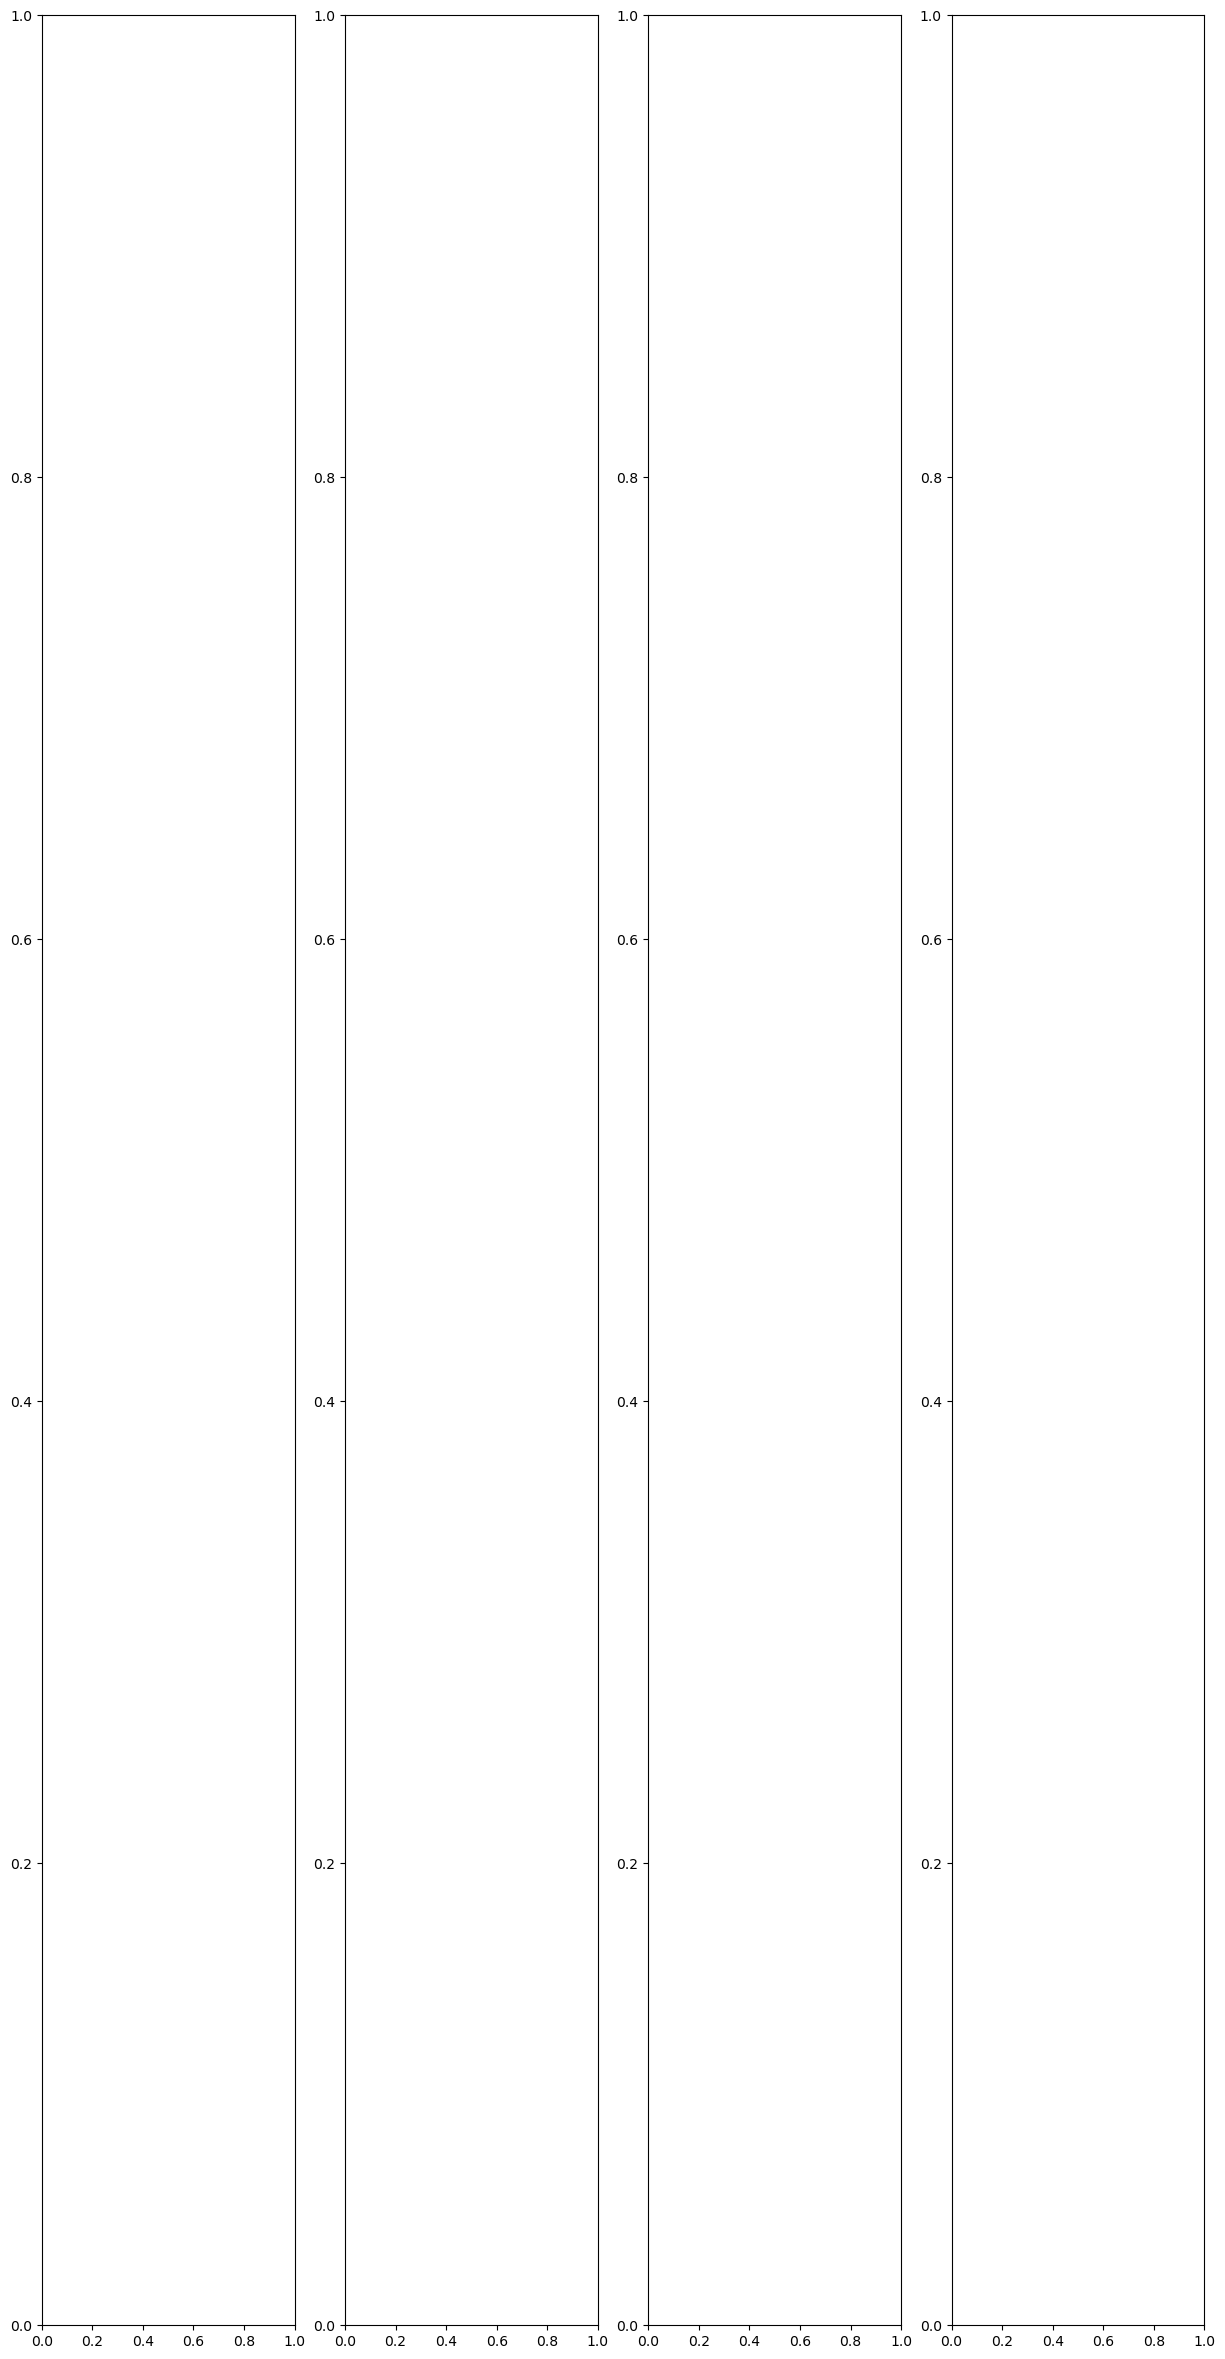

In [20]:

# Create the figure with 4 columns and 9 rows
fig, axs = plt.subplots(1, 4, figsize=(15, 30))  # 9 rows, 4 columns

# Loop over each of the four variables (precipitation, evaporation, runoff, cnbs)
cnbs = ['precipitation', 'evaporation', 'runoff', 'cnbs']
for i, var in enumerate(cnbs):
    # Group by 'model' and plot the timeseries for each model
    for model in filtered_data['model'].unique():
        model_data = filtered_data[(filtered_data['model'] == model) & (filtered_data['cnbs'] == cnbs)]
        print(model_data)
        axs[0, i].plot(model_data['cfs_run'], model_data['value'], label=model)  # Time should be the x-axis
        axs[0, i].set_title(f'{var.capitalize()} (Model Timeseries)')
        axs[0, i].set_xlabel('Time')
        axs[0, i].set_ylabel(var.capitalize())
        axs[0, i].legend()

# Adjust layout and spacing to prevent overlap
plt.tight_layout()
plt.show()